In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from skimage.measure import ransac, LineModelND
import math


In [7]:
df = pd.read_csv('scanData.txt',delimiter=',')
angle = df.values[:,0]
distance = df.values[:,1]

In [9]:
cartesian = [(r*math.cos(phi*math.pi/180), r*math.sin(phi*math.pi/180)) for r, phi in zip(distance, angle)]
#print(x,y)
x, y = map(list, zip(*cartesian))
#print(cartesian)

In [11]:
data = np.column_stack([y, x])
#print(data)

In [20]:
model = LineModelND()
model.estimate(data) 

True

In [45]:
model_robust, inliers = ransac(data, LineModelND, min_samples=20,
                               residual_threshold=2, max_trials=1000)

print( inliers)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [46]:
outliers = inliers == False

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y = model.predict_y(line_x)
line_y_robust = model_robust.predict_y(line_x)
print(line_y_robust)

[-2242.22298884 -2246.53647447 -2250.8499601  -2255.16344574
 -2259.47693137 -2263.790417   -2268.10390263 -2272.41738826
 -2276.73087389 -2281.04435953 -2285.35784516 -2289.67133079
 -2293.98481642 -2298.29830205 -2302.61178768 -2306.92527332
 -2311.23875895 -2315.55224458 -2319.86573021 -2324.17921584
 -2328.49270147 -2332.8061871  -2337.11967274 -2341.43315837
 -2345.746644   -2350.06012963 -2354.37361526 -2358.68710089
 -2363.00058653 -2367.31407216 -2371.62755779 -2375.94104342
 -2380.25452905 -2384.56801468 -2388.88150032 -2393.19498595
 -2397.50847158 -2401.82195721 -2406.13544284 -2410.44892847
 -2414.76241411 -2419.07589974 -2423.38938537 -2427.702871
 -2432.01635663 -2436.32984226 -2440.6433279  -2444.95681353
 -2449.27029916 -2453.58378479 -2457.89727042 -2462.21075605
 -2466.52424169 -2470.83772732 -2475.15121295 -2479.46469858
 -2483.77818421 -2488.09166984 -2492.40515548 -2496.71864111
 -2501.03212674 -2505.34561237 -2509.659098   -2513.97258363
 -2518.28606926 -2522.5995

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

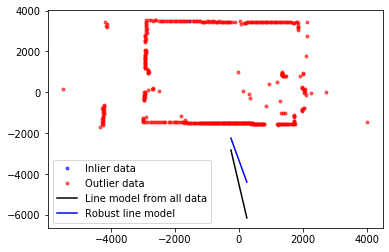

In [47]:
fig, ax = plt.subplots()
print(inliers)
print(data[inliers, 1])
#a= np.array([1, 2, 3, 4, 5 ])
#print(a[1,2])
ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6,
        label='Inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.r', alpha=0.6,
        label='Outlier data')
ax.plot(line_x, line_y, '-k', label='Line model from all data')
ax.plot(line_x, line_y_robust, '-b', label='Robust line model')
ax.legend(loc='lower left')
plt.show()